In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
# from config import api_key
import numpy as np
import os
import tensorflow as tf

In [64]:
scorecard = pd.read_csv("resources/Scorecard.csv")
scorecard

C:\Users\armat\AppData\Local\Temp\ipykernel_15744\1361875663.py:1: DtypeWarning: Columns (2,7,8,9,10,20,24,25,26,27,28,29,30,31,32,33,34,35,36,100,101,102,290,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,6

,Id,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,Year
0,1,100636,01230800,12308,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,AL,361126613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,2,100654,00100200,1002,ALABAMA A & M UNIVERSITY,NORMAL,AL,35762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
2,3,100663,00105200,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,352940110,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
3,4,100672,00574900,5749,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,5,100690,02503400,25034,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,AL,361173553,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124694,124695,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124695,124696,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124696,124697,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124697,124698,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013


In [65]:
# scorecard_reduced = scorecard[["INSTNM", "CITY", "ZIP", "NUMBRANCH", "HIGHDEG", "CONTROL", "st_fips", "region", 
#                                "ADM_RATE_ALL", "SATVRMID", "SATMTMID", "SAT_AVG", "PCIP01", 
#                                "PCIP03", "PCIP04", "PCIP05", "PCIP09", "PCIP10", "PCIP11", "PCIP12", "PCIP13", "PCIP14",
#                                "PCIP15", "PCIP16", "PCIP19", "PCIP22", "PCIP23", "PCIP24", "PCIP25", "PCIP26", "PCIP27",
#                                "PCIP29", "PCIP30", "PCIP31", "PCIP38", "PCIP39", "PCIP40", "PCIP41", "PCIP42", "PCIP43",
#                                "PCIP44", "PCIP45", "PCIP46", "PCIP47", "PCIP48", "PCIP49", "PCIP50", "PCIP51", "PCIP52",
#                                "PCIP54", "UGDS", "CURROPER", "TUITIONFEE_IN", "TUITIONFEE_OUT", "INEXPFTE", "AVGFACSAL",
#                                "C150_4", "D150_4", "CDR2", "DEBT_MDN", "CUML_DEBT_N", "INC_N", "APPL_SCH_N", "REPAY_DT_N", 
#                                "gt_25k_p10"]]

In [66]:
scorecard_cleaned = scorecard[["INSTNM", "NUMBRANCH", "HIGHDEG", "CONTROL", "st_fips", "region", 
                               "ADM_RATE_ALL", "SATVRMID", "SATMTMID", "SAT_AVG", "UGDS", "CURROPER", "TUITIONFEE_IN", "TUITIONFEE_OUT", "INEXPFTE", "AVGFACSAL",
                               "C150_4", "D150_4", "CDR2", "DEBT_MDN", "CUML_DEBT_N", "INC_N", "APPL_SCH_N", "REPAY_DT_N", 
                               "mn_earn_wne_p6"]]

In [67]:
rep_priv = scorecard_cleaned.replace("PrivacySuppressed", "")

In [68]:
#the dataset has 25k as the "threshold earnings" and shows a percentage of people from different universities meeting the threshold, so this will be target
cardscores = rep_priv.dropna(subset=['mn_earn_wne_p6'])

In [69]:
cardscores

,INSTNM,NUMBRANCH,HIGHDEG,CONTROL,st_fips,region,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,...,AVGFACSAL,C150_4,D150_4,CDR2,DEBT_MDN,CUML_DEBT_N,INC_N,APPL_SCH_N,REPAY_DT_N,mn_earn_wne_p6
46082,ALABAMA A & M UNIVERSITY,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.4457,NaN,NaN,850.0,...,4991.0,0.3802,789.0,0.124,13187,2795,,2862,1986,30300
46083,UNIVERSITY OF ALABAMA AT BIRMINGHAM,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.8049,NaN,NaN,1010.0,...,6734.0,0.3857,1115.0,0.037,10500,4533,5005,5022,3733,37500
46084,SOUTHERN CHRISTIAN UNIVERSITY,1,Graduate degree,Private nonprofit,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,NaN,NaN,...,3043.0,NaN,NaN,0.028,10158,272,,312,235,
46085,UNIVERSITY OF ALABAMA IN HUNTSVILLE,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.8756,575.0,570.0,1130.0,...,6257.0,0.4369,396.0,0.047,10500,1962,,1939,1435,40600
46086,ALABAMA STATE UNIVERSITY,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.5042,NaN,NaN,NaN,...,5017.0,0.2117,954.0,0.179,9938,3864,3295,3308,2034,25300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109092,Strayer University-Charleston Campus,84,Non-degree-granting,Private for-profit,South Carolina,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109093,Strayer University-Irving,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109094,Strayer University-Katy,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109095,Strayer University-Northwest Houston,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200


In [70]:
cardscores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32688 entries, 46082 to 109096
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INSTNM          32688 non-null  object 
 1   NUMBRANCH       32688 non-null  int64  
 2   HIGHDEG         32688 non-null  object 
 3   CONTROL         32688 non-null  object 
 4   st_fips         32687 non-null  object 
 5   region          32687 non-null  object 
 6   ADM_RATE_ALL    14487 non-null  float64
 7   SATVRMID        6243 non-null   float64
 8   SATMTMID        6292 non-null   float64
 9   SAT_AVG         7235 non-null   float64
 10  UGDS            30874 non-null  float64
 11  CURROPER        32688 non-null  object 
 12  TUITIONFEE_IN   20678 non-null  float64
 13  TUITIONFEE_OUT  20333 non-null  float64
 14  INEXPFTE        31413 non-null  float64
 15  AVGFACSAL       20707 non-null  float64
 16  C150_4          10947 non-null  float64
 17  D150_4          10947 non-null 

In [71]:
columns_to_convert = ['DEBT_MDN', 'CUML_DEBT_N', 'INC_N', 
                      'APPL_SCH_N', 'REPAY_DT_N', 'mn_earn_wne_p6']
cardscores[columns_to_convert] = cardscores[columns_to_convert].replace('', np.nan)

cardscores[columns_to_convert] = cardscores[columns_to_convert].astype(float)

C:\Users\armat\AppData\Local\Temp\ipykernel_15744\2952473305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[columns_to_convert] = cardscores[columns_to_convert].replace('', np.nan)
C:\Users\armat\AppData\Local\Temp\ipykernel_15744\2952473305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[columns_to_convert] = cardscores[columns_to_convert].astype(float)


In [72]:
cardscores.columns

Index(['INSTNM', 'NUMBRANCH', 'HIGHDEG', 'CONTROL', 'st_fips', 'region',
       'ADM_RATE_ALL', 'SATVRMID', 'SATMTMID', 'SAT_AVG', 'UGDS', 'CURROPER',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'INEXPFTE', 'AVGFACSAL', 'C150_4',
       'D150_4', 'CDR2', 'DEBT_MDN', 'CUML_DEBT_N', 'INC_N', 'APPL_SCH_N',
       'REPAY_DT_N', 'mn_earn_wne_p6'],
      dtype='object')

In [73]:
for col in cardscores.columns:
    if cardscores[col].dtype in ['float64', 'int64']:
        mean_value = cardscores[col].mean()
        cardscores[col].fillna(mean_value, inplace=True)


C:\Users\armat\AppData\Local\Temp\ipykernel_15744\239783290.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cardscores[col].fillna(mean_value, inplace=True)
C:\Users\armat\AppData\Local\Temp\ipykernel_15744\239783290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[col].fillna(mean_value, inplace=True)


In [74]:
# cardscores.to_csv("test3.csv")

In [75]:
#converting float to int here to reduce memory demands for model training
# floaters = cardscores.select_dtypes(include=['float']).columns
# float_columns = [col for col in floaters if col != "gt_25k_p10"]
# cardscores[float_columns] = cardscores[float_columns].astype(int)
# cardscores["gt_25k_p10"] = cardscores["gt_25k_p10"].astype(float)

In [76]:
cardscores.to_csv("cards.csv")

In [77]:
cardscores.sort_values(by="mn_earn_wne_p6", ascending=False).head(12)

,INSTNM,NUMBRANCH,HIGHDEG,CONTROL,st_fips,region,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,...,AVGFACSAL,C150_4,D150_4,CDR2,DEBT_MDN,CUML_DEBT_N,INC_N,APPL_SCH_N,REPAY_DT_N,mn_earn_wne_p6
105721,Medical College of Wisconsin,1,Graduate degree,Private nonprofit,Wisconsin,"Great Lakes (IL, IN, MI, OH, WI)",0.695113,529.020503,532.6815,1052.416171,...,5425.378761,0.486122,628.019092,0.000,9337.004446,6314.339502,8122.084872,6370.447796,4977.480314,151000.0
90130,Oklahoma State University Center for Health Sc...,1,Graduate degree,Public,Oklahoma,"Southwest (AZ, NM, OK, TX)",0.695113,529.020503,532.6815,1052.416171,...,5425.378761,0.486122,628.019092,0.000,6625.000000,6314.339502,8122.084872,6370.447796,4977.480314,142800.0
89069,A T Still University of Health Sciences,1,Graduate degree,Private nonprofit,Missouri,"Plains (IA, KS, MN, MO, NE, ND, SD)",0.695113,529.020503,532.6815,1052.416171,...,7586.000000,0.486122,628.019092,0.002,37160.000000,6314.339502,8122.084872,6370.447796,4977.480314,124200.0
73303,Western University of Health Sciences,1,Graduate degree,Private nonprofit,California,"Far West (AK, CA, HI, NV, OR, WA)",0.695113,529.020503,532.6815,1052.416171,...,8283.000000,0.486122,628.019092,0.000,9337.004446,6314.339502,158.000000,158.000000,158.000000,122400.0
91234,Medical College of Wisconsin,1,Graduate degree,Private nonprofit,Wisconsin,"Great Lakes (IL, IN, MI, OH, WI)",0.695113,529.020503,532.6815,1052.416171,...,5425.378761,0.486122,628.019092,0.000,4775.000000,6314.339502,8122.084872,6370.447796,4977.480314,122100.0
73069,Thunderbird School of Global Management,1,Graduate degree,Private nonprofit,Arizona,"Southwest (AZ, NM, OK, TX)",0.695113,529.020503,532.6815,1052.416171,...,9766.000000,0.486122,628.019092,0.008,9337.004446,6314.339502,126.000000,126.000000,126.000000,117700.0
73235,University of California Hastings College of Law,1,Graduate degree,Public,California,"Far West (AK, CA, HI, NV, OR, WA)",0.695113,529.020503,532.6815,1052.416171,...,13995.000000,0.486122,628.019092,0.001,9337.004446,6314.339502,357.000000,357.000000,356.000000,117400.0
59571,University of California Hastings College of Law,1,Graduate degree,Public,California,"Far West (AK, CA, HI, NV, OR, WA)",0.695113,529.020503,532.6815,1052.416171,...,11581.000000,0.486122,628.019092,0.004,14700.000000,6314.339502,409.000000,409.000000,408.000000,117000.0
75600,Brooklyn Law School,1,Graduate degree,Private nonprofit,New York,"Mid East (DE, DC, MD, NJ, NY, PA)",0.695113,529.020503,532.6815,1052.416171,...,15528.000000,0.486122,628.019092,0.000,5000.000000,125.000000,8122.084872,345.000000,345.000000,115900.0
59642,Western University of Health Sciences,1,Graduate degree,Private nonprofit,California,"Far West (AK, CA, HI, NV, OR, WA)",0.695113,529.020503,532.6815,1052.416171,...,7759.000000,0.486122,628.019092,0.000,9337.004446,14.000000,150.000000,150.000000,150.000000,114500.0


In [78]:
# cardscores['relative_success'] = cardscores['gt_25k_p10'].apply(classify_relative_success)
cardscores.loc[:, 'relative_success'] = np.where(cardscores['mn_earn_wne_p6'] > 25000, "yes", "no")

C:\Users\armat\AppData\Local\Temp\ipykernel_15744\524859965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores.loc[:, 'relative_success'] = np.where(cardscores['mn_earn_wne_p6'] > 25000, "yes", "no")


In [87]:
cardscores.drop("INSTNM", axis=1, inplace=True)

C:\Users\armat\AppData\Local\Temp\ipykernel_15744\740589651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores.drop("INSTNM", axis=1, inplace=True)


In [88]:
numeric_scorecard = pd.get_dummies(cardscores)
# numeric_scorecard

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

MODEL 1

In [90]:
X = numeric_scorecard.drop(columns=["relative_success_no", "relative_success_yes", "mn_earn_wne_p6"], axis=1)
y = numeric_scorecard["relative_success_no"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

In [91]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [92]:
input_features = X_train_scaled.shape[1]
hidden_nodes_1 = 30
hidden_nodes_2 = 25
hidden_nodes_3 = 15

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim = input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_3, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

c:\Users\armat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │         2,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,121 (16.10 KB)

 Trainable params: 4,121 (16.10 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
model = nn.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7628 - loss: 0.4574
Epoch 2/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8165 - loss: 0.3720
Epoch 3/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8157 - loss: 0.3665
Epoch 4/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8267 - loss: 0.3485
Epoch 5/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8338 - loss: 0.3345
Epoch 6/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8378 - loss: 0.3376
Epoch 7/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8355 - loss: 0.3264
Epoch 8/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8403 - loss: 0.3214
Epoch 9/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8410 - loss: 0.3180
Epoch 10/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8468 - loss: 0.3078
Epoch 11/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8518 - loss: 0.3063
Epoch 12/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [95]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 - 0s - 1ms/step - accuracy: 0.8260 - loss: 0.3517
Loss: 0.35166674852371216, Accuracy: 0.8259912133216858


Model 2: Checking for data leakage

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
lin_regress = LinearRegression()
# sample = numeric_scorecard.sample(frac=0.3, random_state=42)
X = numeric_scorecard.drop(columns=["relative_success_no", "relative_success_yes", "mn_earn_wne_p6"], axis=1)
y = numeric_scorecard["relative_success_no"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [99]:
lin_regress.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = lin_regress.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.14
R-squared: 0.25


In [102]:
me = mse ** .5
print(me)

0.3759515555679847


0.1 7546763809.27
0.15 12162.83
0.2 60957.76
0.25 30057.25
0.3 215525769.29

Text(0.5, 1.0, 'Mean Squared Error For Different Fractions of the Dataset')

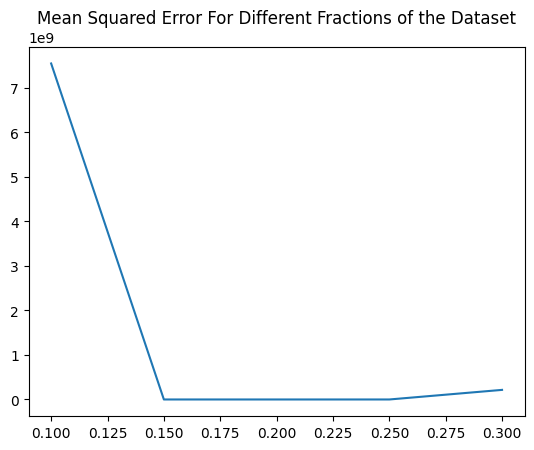

In [103]:
sample_size = [0.1, 0.15, 0.2, 0.25, 0.3]
mse = [7546763809.27, 12162.83, 60957.76, 30057.25, 215525769.29]
plt.plot(sample_size, mse)
plt.title('Mean Squared Error For Different Fractions of the Dataset')

Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

0.08233322116855307
0.5646817928721697


In [ ]:
importances = rf.feature_importances_

In [ ]:
feature_names = X.columns
feature_importance_list = [(feature, importance) for feature, importance in zip(feature_names, importances)]
feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

In [ ]:
for feature, importance in feature_importance_list:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: CONTROL_Private for-profit, Importance: 0.10621218438684271
Feature: APPL_SCH_N, Importance: 0.09905357996914162
Feature: REPAY_DT_N, Importance: 0.07779545245415989
Feature: UGDS, Importance: 0.0647268296948107
Feature: CDR2, Importance: 0.060654854874785905
Feature: INEXPFTE, Importance: 0.05735573362165253
Feature: DEBT_MDN, Importance: 0.056985603636624735
Feature: TUITIONFEE_IN, Importance: 0.05143143975701961
Feature: CUML_DEBT_N, Importance: 0.04498973712315663
Feature: AVGFACSAL, Importance: 0.041040373697193086
Feature: INC_N, Importance: 0.03459568621211407
Feature: ADM_RATE_ALL, Importance: 0.030990057917402135
Feature: HIGHDEG_Certificate degree, Importance: 0.02854235669759379
Feature: NUMBRANCH, Importance: 0.026087664721349806
Feature: TUITIONFEE_OUT, Importance: 0.022987025133501458
Feature: st_fips_Puerto Rico, Importance: 0.02204589846915194
Feature: HIGHDEG_Graduate degree, Importance: 0.013678765823911351
Feature: region_Southeast (AL, AR, FL, GA, KY, LA, M

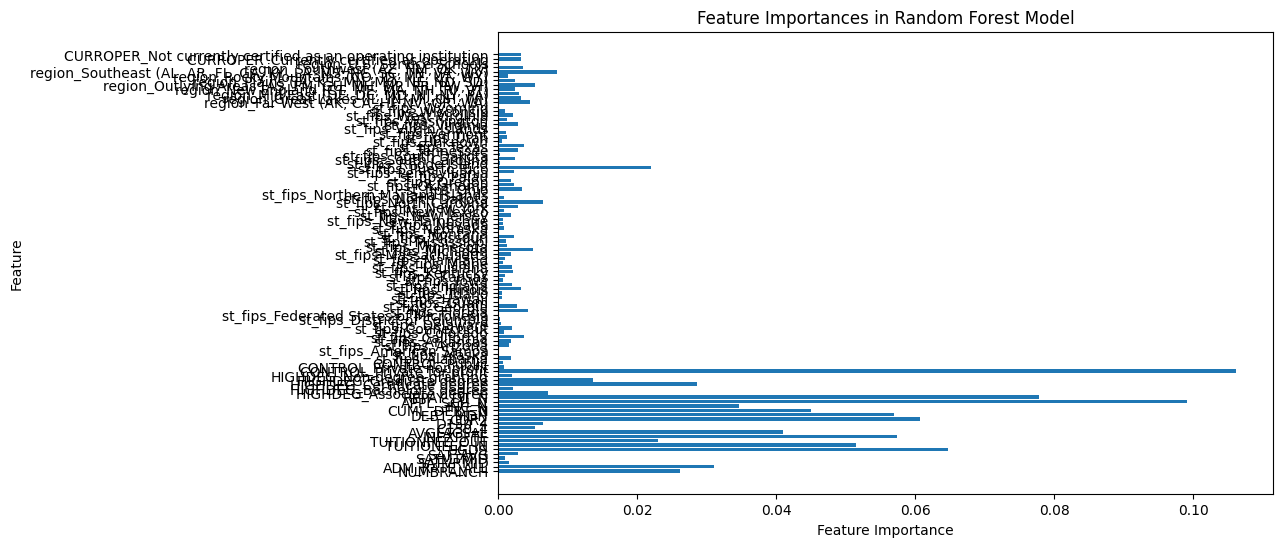

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()